In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

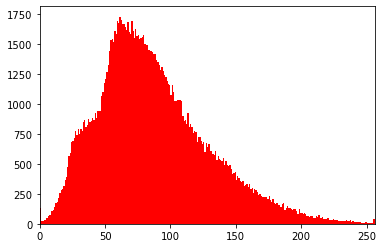

In [10]:
img = cv2.imread('D:/dl_data/data224/JPG/Kenya_AOI_after_224_JPG/kenya_aoi_after (1).JPG')
# create a CLAHE object (Arguments are optional).
hist,bins = np.histogram(img.flatten(),256,[0,256])
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()




In [14]:
def histogram_equalization(img_in):
    # segregate color streams
    b,g,r = cv2.split(img_in)
    h_b, bin_b = np.histogram(b.flatten(), 256, [0, 256])
    h_g, bin_g = np.histogram(g.flatten(), 256, [0, 256])
    h_r, bin_r = np.histogram(r.flatten(), 256, [0, 256])
    # calculate cdf    
    cdf_b = np.cumsum(h_b)  
    cdf_g = np.cumsum(h_g)
    cdf_r = np.cumsum(h_r)
    
    # mask all pixels with value=0 and replace it with mean of the pixel values 
    cdf_m_b = np.ma.masked_equal(cdf_b,0)
    cdf_m_b = (cdf_m_b - cdf_m_b.min())*255/(cdf_m_b.max()-cdf_m_b.min())
    cdf_final_b = np.ma.filled(cdf_m_b,0).astype('uint8')
  
    cdf_m_g = np.ma.masked_equal(cdf_g,0)
    cdf_m_g = (cdf_m_g - cdf_m_g.min())*255/(cdf_m_g.max()-cdf_m_g.min())
    cdf_final_g = np.ma.filled(cdf_m_g,0).astype('uint8')
    cdf_m_r = np.ma.masked_equal(cdf_r,0)
    cdf_m_r = (cdf_m_r - cdf_m_r.min())*255/(cdf_m_r.max()-cdf_m_r.min())
    cdf_final_r = np.ma.filled(cdf_m_r,0).astype('uint8')
    # merge the images in the three channels
    img_b = cdf_final_b[b]
    img_g = cdf_final_g[g]
    img_r = cdf_final_r[r]
  
    img_out = cv2.merge((img_b, img_g, img_r))
    # validation
    equ_b = cv2.equalizeHist(b)
    equ_g = cv2.equalizeHist(g)
    equ_r = cv2.equalizeHist(r)
    equ = cv2.merge((equ_b, equ_g, equ_r))
    #print(equ)
    #cv2.imwrite('output_name.png', equ)
    return img_out

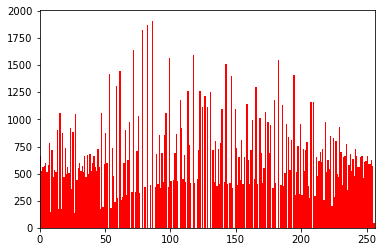

In [18]:
hist,bins = np.histogram(img_eq.flatten(),256,[0,256])
plt.hist(img_eq.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

In [36]:
before_dir = 'D:/dl_data/data224/JPG/Kenya_AOI_before_224_JPG'
eq_before_dir = 'D:/dl_data/data224/JPG/Kenya_AOI_before_224_JPG_equalized'
after_dir = 'D:/dl_data/data224/JPG/Kenya_AOI_after_224_JPG'
eq_after_dir = 'D:/dl_data/data224/JPG/Kenya_AOI_after_224_JPG_equalized'

In [35]:
import os
for filename in os.listdir(before_dir):
    img = cv2.imread(os.path.join(before_dir, filename))
    eq_img = histogram_equalization(img)
    cv2.imwrite(os.path.join(eq_before_dir, filename), eq_img)
    

In [37]:
for filename in os.listdir(after_dir):
    img = cv2.imread(os.path.join(after_dir, filename))
    eq_img = histogram_equalization(img)
    cv2.imwrite(os.path.join(eq_after_dir, filename), eq_img)

In [ ]:

# Check one of the equalized images
img = cv2.imread('D:/dl_data/data224/JPG/Kenya_AOI_before_224_JPG_equalized/kenya_aoi_before (5).JPG', 0)

In [ ]:
# Window name in which image is displayed 
window_name = 'image'
  
# Using cv2.imshow() method 
# Displaying the image 
cv2.imshow(window_name, img) 
  
# waits for user to press any key 
# (this is necessary to avoid Python kernel form crashing) 
cv2.waitKey(0) 
  
# closing all open windows 
cv2.destroyAllWindows() 